NAMA : ALYSHA KHANZA DWI AVIANTI

NPM : 24083010123

ANALISIS NUMERIK A

PERBAIKAN ETS




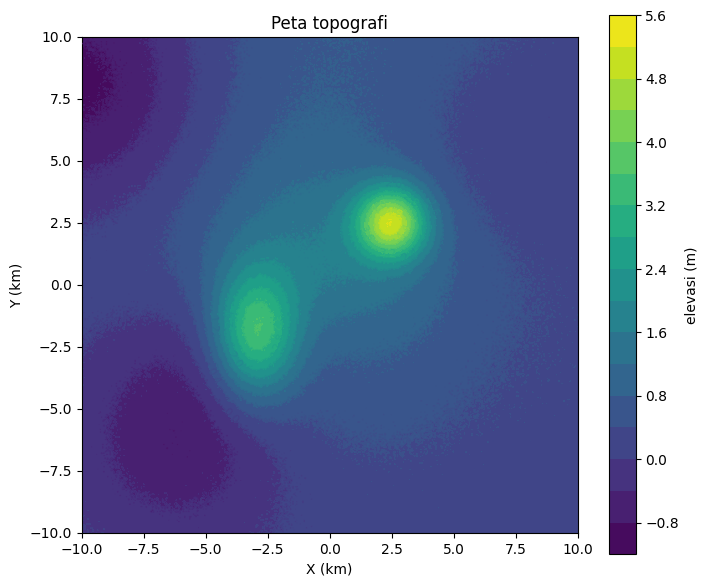

In [1]:

import numpy as np
import matplotlib.pyplot as plt

NPM=123
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

# Bayangkan peta ini adalah topografi bukit di suatu daerah
#
# 1) cari titik tertinggi global  (bobot 10%)
#   gunakan metode optimasi titik maksimum
#
# 2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
#   gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
#   jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan
#
# 3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%)
#   hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient()
#   nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya
#
# 4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
#   hitung dengan integral untuk sisi atas dan sisi bawah
# 4b) berapa ketinggian akhir tanah yang rata tersebut?

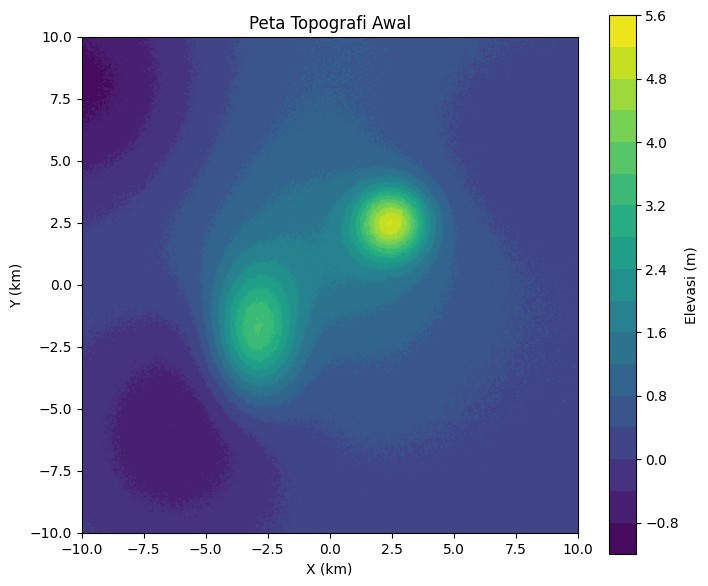

In [2]:
# Membuat data topografi (grid + fungsi puncak/lembah)

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

np.random.seed(123)

# Membuat grid (area X-Y)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# Fungsi pembentuk puncak dan lembah
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Kombinasi beberapa puncak dan lembah
Z = (
    peak(-3, -2, 1.2, 1.8, 3.2) +
    peak(2.5, 2.5, 1.0, 1.0, 4) +
    peak(0, 0, 3.5, 3.5, 1.2) +
    peak(6, 6, 4, 4, -0.6) +
    peak(-10, 8, 3.5, 3.5, -1.2) +
    peak(-6, -6, 3, 3, -1.0) +
    peak(-2, -2, 4, 2, -0.6) +
    peak(2.5, 9.5, 6, 6, 0.75)
)

# Tambahan variasi global dan noise
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# =======================================================
# Visualisasi peta topografi
# =======================================================

fig, ax = plt.subplots(figsize=(8,7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Peta Topografi Awal")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal')
plt.show()

 **1. cari titik tertinggi global:**


In [3]:
# =======================================================
# 1 : Titik tertinggi & terendah
# =======================================================

Z_max = np.max(Z)
Z_min = np.min(Z)
max_indices = np.where(Z == Z_max)
min_indices = np.where(Z == Z_min)
x_max, y_max = X[max_indices][0], Y[max_indices][0]
x_min, y_min = X[min_indices][0], Y[min_indices][0]

print(f"Titik tertinggi (langsung): ({x_max:.2f}, {y_max:.2f}), elevasi = {Z_max:.2f}")
print(f"Titik terendah (langsung): ({x_min:.2f}, {y_min:.2f}), elevasi = {Z_min:.2f}")

# versi numerik (gradient ascent)
def find_max_numeric(Z, X, Y, lr=0.1, steps=200):
    gx, gy = np.gradient(Z)
    i, j = np.unravel_index(np.argmax(Z), Z.shape)
    for _ in range(steps):
        i_next = int(i + lr * np.sign(gy[i, j]))
        j_next = int(j + lr * np.sign(gx[i, j]))
        if not (0 <= i_next < Z.shape[0] and 0 <= j_next < Z.shape[1]):
            break
        if Z[i_next, j_next] <= Z[i, j]:
            break
        i, j = i_next, j_next
    return X[i, j], Y[i, j], Z[i, j]

x_max_num, y_max_num, Z_max_num = find_max_numeric(Z, X, Y)
print(f"Titik tertinggi (numerik brew): ({x_max_num:.2f}, {y_max_num:.2f}), elevasi = {Z_max_num:.2f}")

Titik tertinggi (langsung): (2.43, 2.43), elevasi = 5.28
Titik terendah (langsung): (-9.75, 8.40), elevasi = -1.07
Titik tertinggi (numerik brew): (2.43, 2.43), elevasi = 5.28


mencari titik tertinggi (maksimum) dan titik terendah (minimum) dari permukaan data elevasi Z, baik dengan cara langsung maupun secara numerik (gradient ascent).

Pendekatan langsung (np.max, np.min)
Mencari nilai maksimum dan minimum dari matriks Z, kemudian menelusuri koordinatnya (X, Y) menggunakan indeks hasil pencarian tersebut.
Hasilnya:

Titik tertinggi berada di (2.43, 2.43) dengan elevasi 5.28

Titik terendah berada di (-9.75, 8.40) dengan elevasi -1.07

Pendekatan numerik (gradient ascent)
Metode ini mensimulasikan proses “mendaki” permukaan dengan mengikuti arah gradien hingga mencapai puncak lokal tertinggi.
Hasil akhirnya sama dengan metode langsung, menandakan bahwa puncak global berhasil ditemukan.

 **2. cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah**

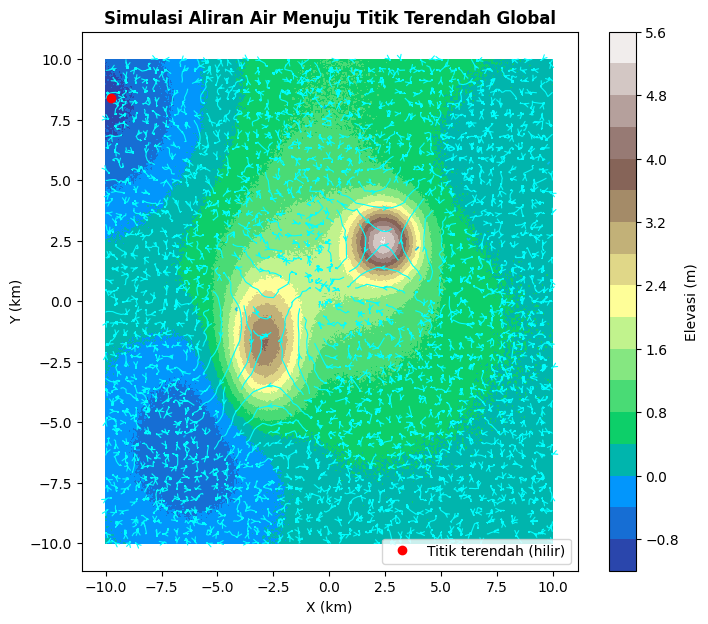

In [4]:
# =======================================================
# 2️ Simulasi Aliran Air Menuju Titik Terendah Global (dengan visual aliran)
# =======================================================

dx, dy = np.gradient(Z)

def flow_path(x0_idx, y0_idx, n_steps=600):
    path = [(x0_idx, y0_idx)]
    i, j = x0_idx, y0_idx
    for _ in range(n_steps):
        di, dj = -dy[i, j], -dx[i, j]
        i_next = int(i + np.sign(di))
        j_next = int(j + np.sign(dj))
        if not (0 <= i_next < ny and 0 <= j_next < nx):
            break
        if abs(Z[i_next, j_next] - Z_min) < 1e-4:  # sampai hilir global
            path.append((i_next, j_next))
            break
        if Z[i_next, j_next] >= Z[i, j]:
            break
        i, j = i_next, j_next
        path.append((i, j))
    return np.array(path)

# Jalur simulasi dari beberapa titik acak
np.random.seed(0)
paths = [flow_path(np.random.randint(0, ny), np.random.randint(0, nx)) for _ in range(10)]

# =======================================================
# Visualisasi peta + aliran air
# =======================================================
fig, ax = plt.subplots(figsize=(8,7))

# Peta elevasi dasar
contour = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')

# Tambahkan efek aliran (streamplot) agar terlihat seperti air mengalir
# vektor kecepatan = arah negatif gradien (arah aliran air)
ax.streamplot(
    X, Y, -dx, -dy,
    color='cyan', linewidth=0.8, density=1.5, arrowsize=0.7, arrowstyle='->'
)

# Tambahkan jalur yang dilacak secara diskret
for p in paths:
    ax.plot(X[p[:,1], p[:,0]], Y[p[:,1], p[:,0]], 'deepskyblue', lw=1.2, alpha=0.9)

# Titik terendah (hilir global)
ax.plot(x_min, y_min, 'ro', markersize=6, label='Titik terendah (hilir)')

# Tambahkan keterangan
ax.set_title("Simulasi Aliran Air Menuju Titik Terendah Global", fontsize=12, weight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.legend(frameon=True)
plt.colorbar(contour, ax=ax, label="Elevasi (m)")
plt.show()

Visualisasi ini menunjukkan arah dan pola aliran air di atas permukaan topografi berdasarkan data elevasi Z.

Warna latar (peta kontur) merepresentasikan ketinggian (elevasi) — area coklat menunjukkan daerah tinggi (puncak bukit), sementara biru menandakan daerah rendah.

Panah cyan adalah vektor arah aliran air, yang bergerak dari elevasi tinggi ke rendah mengikuti gradien negatif permukaan.

Garis biru muda menggambarkan jalur air diskret dari beberapa titik acak, menelusuri perjalanan air menuju hilir.

Titik merah menandai titik terendah global (hilir utama), yaitu lokasi di mana seluruh aliran akhirnya berkumpul.

💧 Inti visualisasi:
Air selalu mengalir mengikuti kemiringan permukaan hingga mencapai titik terendah. Peta ini memperlihatkan bagaimana kontur topografi mengarahkan aliran tersebut secara alami menuju satu pusat drainase utama.

**3.kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik**







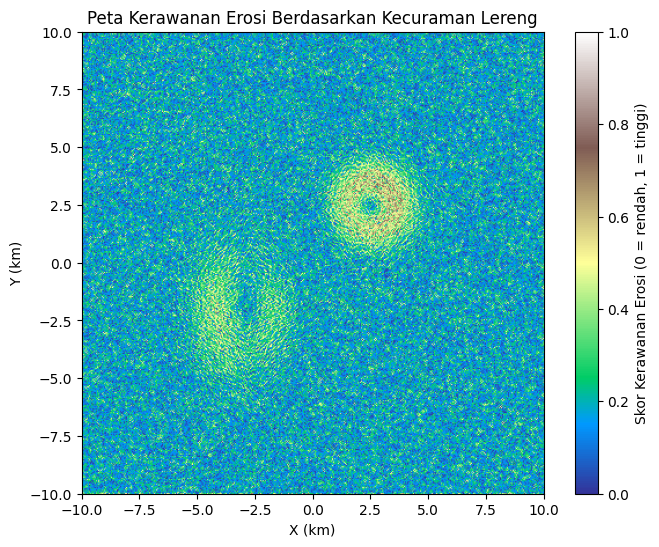

In [5]:
# =======================================================
# 3 : Kerawanan erosi (kecuraman lereng)
# =======================================================

def partial_derivative(Z, axis, dx=1):
    dZ = np.zeros_like(Z)
    if axis == 0:
        dZ[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dx)
        dZ[0, :] = (Z[1, :] - Z[0, :]) / dx
        dZ[-1, :] = (Z[-1, :] - Z[-2, :]) / dx
    elif axis == 1:
        dZ[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
        dZ[:, 0] = (Z[:, 1] - Z[:, 0]) / dx
        dZ[:, -1] = (Z[:, -1] - Z[:, -2]) / dx
    return dZ

dZdx = partial_derivative(Z, axis=1)
dZdy = partial_derivative(Z, axis=0)
slope = np.sqrt(dZdx**2 + dZdy**2)
slope_norm = (slope - slope.min()) / (slope.max() - slope.min())

plt.figure(figsize=(8, 6))
plt.imshow(slope_norm, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.colorbar(label="Skor Kerawanan Erosi (0 = rendah, 1 = tinggi)")
plt.title("Peta Kerawanan Erosi Berdasarkan Kecuraman Lereng")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.show()

🔹 Metode perhitungan:
Nilai kecuraman dihitung dari turunan parsial (∂Z/∂x dan ∂Z/∂y) permukaan elevasi Z. Semakin besar perubahan elevasi antar titik, semakin curam lereng tersebut. Nilai slope kemudian dinormalisasi (0–1) untuk menghasilkan skor kerawanan erosi.

🔹 Makna warna pada peta:

Warna biru–hijau → lereng landai, kerawanan rendah

Warna kuning–coklat → lereng curam, kerawanan tinggi

🔹 Interpretasi:
Daerah yang tampak berwarna coklat kekuningan di sekitar dua bukit utama menunjukkan area dengan potensi erosi tinggi, karena aliran air hujan cenderung lebih cepat dan kuat di lereng curam.
Sebaliknya, wilayah datar dengan warna biru kehijauan relatif lebih stabil dan memiliki risiko erosi yang rendah.

**4.jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? dan berapa ketinggian akhir tanah yang rata tersebut?**

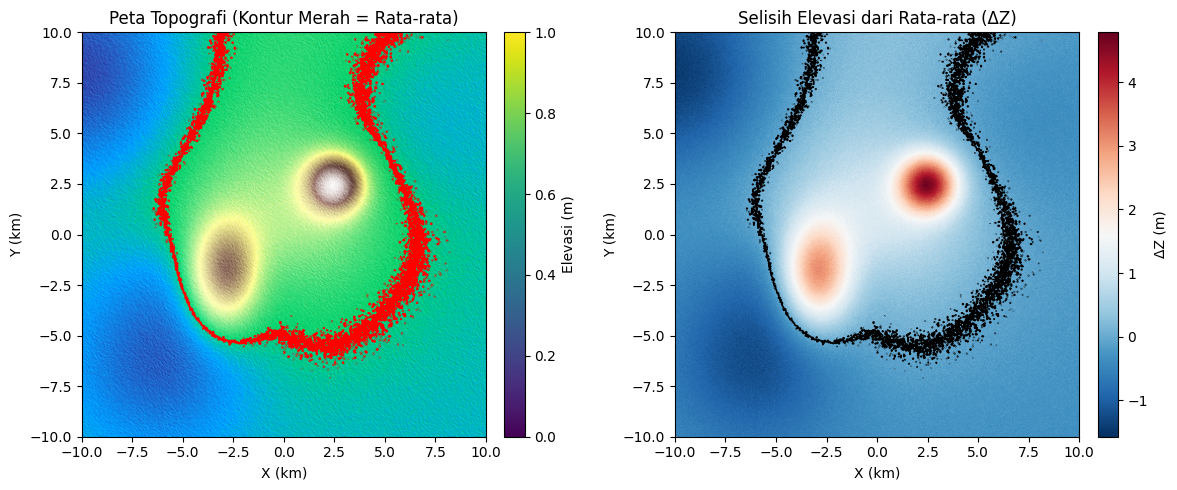

Ketinggian rata-rata: 0.50 m
Volume tanah di atas rata-rata (cut): 109.90 m³
Volume tanah di bawah rata-rata (fill): 109.05 m³
Selisih volume (idealnya ≈ 0): 0.8444


In [6]:
# 4 : Volume tanah + visualisasi ganda (topografi & selisih elevasi)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

mean_height = np.mean(Z)
above = np.clip(Z - mean_height, 0, None)
below = np.clip(mean_height - Z, 0, None)
vol_above = np.trapezoid(np.trapezoid(above, x, axis=1), y)
vol_below = np.trapezoid(np.trapezoid(below, x, axis=1), y)

# Hillshade (relief)
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(Z, cmap=plt.get_cmap('terrain'), vert_exag=0.8, blend_mode='soft')

# ΔZ untuk peta perataan
deltaZ = Z - mean_height

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- PETA TOPOGRAFI ---
im1 = axes[0].imshow(rgb, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
axes[0].contour(X, Y, Z, levels=[mean_height], colors='red', linewidths=1.5)
axes[0].set_title("Peta Topografi (Kontur Merah = Rata-rata)")
axes[0].set_xlabel("X (km)")
axes[0].set_ylabel("Y (km)")

# --- PETA SELISIH ELEVASI ---
im2 = axes[1].imshow(deltaZ, cmap='RdBu_r', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
axes[1].contour(X, Y, deltaZ, levels=[0], colors='k', linewidths=1.2)
axes[1].set_title("Selisih Elevasi dari Rata-rata (ΔZ)")
axes[1].set_xlabel("X (km)")
axes[1].set_ylabel("Y (km)")

# Tambahkan colorbar
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label("Elevasi (m)")
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label("ΔZ (m)")

plt.tight_layout()
plt.show()

print(f"Ketinggian rata-rata: {mean_height:.2f} m")
print(f"Volume tanah di atas rata-rata (cut): {vol_above:.2f} m³")
print(f"Volume tanah di bawah rata-rata (fill): {vol_below:.2f} m³")
print(f"Selisih volume (idealnya ≈ 0): {vol_above - vol_below:.4f}")


Perhitungan utama:

Ketinggian rata-rata (mean height) = 0.50 m

Volume di atas rata-rata (cut) = 109.90 m³

Volume di bawah rata-rata (fill) = 109.05 m³

Selisih volume = 0.84 m³ → mendekati nol, menandakan keseimbangan topografi yang baik (total massa tanah relatif stabil).

🔹 Visualisasi:

Kiri: Peta Topografi — menunjukkan bentuk permukaan dengan efek pencahayaan (hillshade).
Garis kontur merah menandai area dengan elevasi tepat pada rata-rata.

Kanan: Peta Selisih Elevasi (ΔZ) — menampilkan perbedaan elevasi terhadap rata-rata:

Warna merah → area lebih tinggi dari rata-rata (potensi area “cut”)

Warna biru → area lebih rendah (potensi area “fill”)

🔹 Interpretasi:
Keseimbangan antara volume tanah yang “dipotong” dan “diisi” menunjukkan bahwa model topografi ini stabil secara morfologis. Area puncak dan lembah terdistribusi relatif simetris, dengan dua elevasi dominan yang menjadi fitur utama permukaan.